In [1]:
!pip3 install pyspark

You should consider upgrading via the 'pip install --upgrade pip' command.


In [133]:
from pyspark import SparkContext

In [134]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import os

spark = SparkSession.builder \
    .master("local") \
    .appName("Test it 2") \
    .getOrCreate()
sc = spark.sparkContext


In [135]:
spark

Once we have our RDD of Row we can infer and register the schema.

In [136]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

https://spark.apache.org/docs/latest/sql-data-sources-load-save-functions.html

In [137]:
DF = spark.read.load("otomoto.csv", format="csv", sep=";", inferSchema="true", header="true")

In [138]:
DF.registerTempTable("cars")

In [139]:
all_cars = sqlContext.sql("""
    Select przebieg from cars
""")

In [140]:
type(all_cars)

pyspark.sql.dataframe.DataFrame

* https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/functions.html
* https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#module-pyspark.sql.functions
* 

In [141]:
from pyspark.sql.functions import *

In [142]:
CARS = DF.select('id','Marka pojazdu', "Model pojazdu", "przebieg", "price", "rok produkcji")
CARS = CARS.dropna()
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], '\s', ''))
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], 'km', ''))
CARS = CARS.withColumn("przebieg", CARS['przebieg'].cast('int'))


In [143]:
CARS.take(10)

[Row(id=6039269187, Marka pojazdu='Renault', Model pojazdu='Fluence', przebieg=172000, price=25900.0, rok produkcji=2013),
 Row(id=6034090022, Marka pojazdu='Mercedes-Benz', Model pojazdu='Klasa G', przebieg=52904, price=434900.0, rok produkcji=2016),
 Row(id=6039268812, Marka pojazdu='Audi', Model pojazdu='A5', przebieg=56000, price=41900.0, rok produkcji=2011),
 Row(id=6039269107, Marka pojazdu='Volkswagen', Model pojazdu='Polo', przebieg=88000, price=14900.0, rok produkcji=2007),
 Row(id=6038674457, Marka pojazdu='Peugeot', Model pojazdu='206 CC', przebieg=176000, price=5900.0, rok produkcji=2001),
 Row(id=6033752462, Marka pojazdu='Volkswagen', Model pojazdu='Bora', przebieg=300000, price=7900.0, rok produkcji=2003),
 Row(id=6035637917, Marka pojazdu='BMW', Model pojazdu='Seria 5', przebieg=301000, price=9800.0, rok produkcji=2002),
 Row(id=6038678372, Marka pojazdu='Audi', Model pojazdu='Q5', przebieg=155400, price=98900.0, rok produkcji=2013),
 Row(id=6039268967, Marka pojazdu='H

In [144]:
CARS.printSchema()

root
 |-- id: long (nullable = true)
 |-- Marka pojazdu: string (nullable = true)
 |-- Model pojazdu: string (nullable = true)
 |-- przebieg: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- rok produkcji: integer (nullable = true)



In [145]:
from pyspark.sql.functions import udf
udf?

In [146]:
lowercase_name = udf(lambda x: x.lower(), "string")

In [147]:
CARS = CARS.withColumn("Marka pojazdu", lowercase_name(CARS["Marka pojazdu"]))
CARS = CARS.withColumn("Model pojazdu", lowercase_name(CARS["Model pojazdu"]))

In [148]:
CARS = CARS.withColumnRenamed("Marka pojazdu", 'marka') \
    .withColumnRenamed("Model pojazdu", 'model') \
    .withColumnRenamed("rok produkcji", 'rok')

In [149]:
CARS.take(10)

[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001),
 Row(id=6033752462, marka='volkswagen', model='bora', przebieg=300000, price=7900.0, rok=2003),
 Row(id=6035637917, marka='bmw', model='seria 5', przebieg=301000, price=9800.0, rok=2002),
 Row(id=6038678372, marka='audi', model='q5', przebieg=155400, price=98900.0, rok=2013),
 Row(id=6039268967, marka='hyundai', model='santa fe', przebieg=124500, price=14480.0, rok=2004),
 Row(id=6039268802, marka='volkswagen', model='golf', przebieg=95100, price=64900.0, rok=2014)]

In [150]:
price_millage = CARS.select("rok", "przebieg").toPandas()

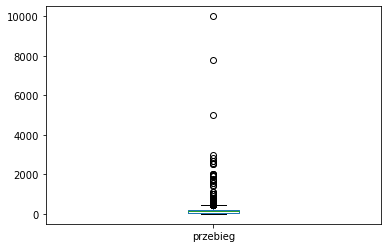

In [163]:
(price_millage['przebieg']/1000).plot.box()

In [164]:
from pyspark.ml.stat import Summarizer

summarizer = Summarizer.metrics("mean", "count")
# compute statistics for multiple metrics without weight


In [165]:
years = CARS.select("rok").toPandas()

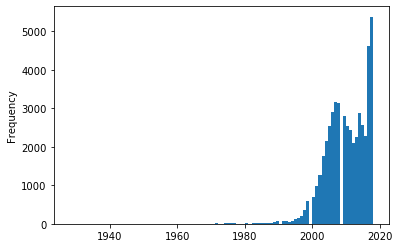

In [166]:
years['rok'].sort_values() \
    .plot(kind='hist', bins = 100)

In [167]:
by_brand = CARS.select("marka").groupBy("marka").count().toPandas()

In [168]:
type(by_brand)

pandas.core.frame.DataFrame

In [169]:
len(by_brand)

87

In [170]:
CARS.count()

50610

In [171]:
CARS_S = CARS.sample(True, 0.1)

In [172]:
CARS_S.count()

5071

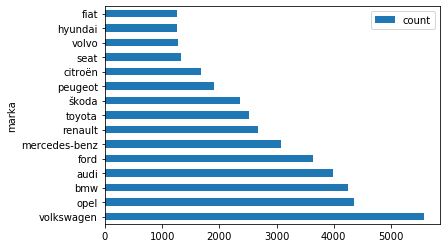

In [200]:
by_brand.index = by_brand['marka']
by_brand.sort_values(by='count', ascending=False)[:15].plot.barh()

In [174]:
przebieg_data = CARS.select('przebieg').toPandas()

In [175]:
przebieg_data['przebieg'] = przebieg_data['przebieg'] / 1000

In [176]:
przebieg_data.describe()

,przebieg
count,50610.000000
mean,134.374310
std,119.935487
min,0.001000
25%,39.763250
50%,143.000000
75%,200.000000
max,9999.999000


In [177]:
przebieg_data = przebieg_data[przebieg_data['przebieg'] < 500]

In [178]:
przebieg_data.describe()

,przebieg
count,50541.000000
mean,132.634068
std,94.311727
min,0.001000
25%,39.460000
50%,142.642000
75%,200.000000
max,499.011000


In [179]:
przebieg_data['przebieg']

0        172.000
1         52.904
2         56.000
3         88.000
4        176.000
          ...   
50605    230.000
50606    160.700
50607    128.486
50608      0.005
50609    139.000
Name: przebieg, Length: 50541, dtype: float64

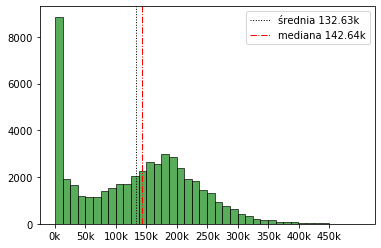

In [180]:
import matplotlib.pyplot as plt
import numpy as np
plt_data = przebieg_data['przebieg']
H, xedges, yedges = plt.hist(plt_data, bins=40, color='green', edgecolor='k', alpha=0.65)

av_line = plt.axvline(plt_data.mean(), color='k', linestyle=':', linewidth=1)
med_line = plt.axvline(plt_data.median(), color='red', linestyle='-.', linewidth=1)

plt.legend([av_line, med_line], ["średnia {0:.2f}k".format(plt_data.mean()), "mediana {0:.2f}k".format(plt_data.median())])

xlabels = map(lambda x: "{}k".format(int(x/1000)) ,np.arange(0, 500000, 50000))
plt.xticks(np.arange(0, 500000, 50000)/1000, xlabels)

plt.show()

In [181]:
top_marki = CARS.select("marka").groupBy("marka").count()\
    .sort("count", ascending=False)\
    .limit(12) \
    .collect()

In [182]:
top_marki = [row.marka for row in top_marki]

In [183]:
top_marki

['volkswagen',
 'opel',
 'bmw',
 'audi',
 'ford',
 'mercedes-benz',
 'renault',
 'toyota',
 'škoda',
 'peugeot',
 'citroën',
 'seat']

In [184]:
CARS = CARS.withColumn('przebieg_k', CARS['przebieg'] / 1000)

In [211]:
CARS.take(10)

[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013, przebieg_k=172.0),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016, przebieg_k=52.904),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011, przebieg_k=56.0),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007, przebieg_k=88.0),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001, przebieg_k=176.0),
 Row(id=6033752462, marka='volkswagen', model='bora', przebieg=300000, price=7900.0, rok=2003, przebieg_k=300.0),
 Row(id=6035637917, marka='bmw', model='seria 5', przebieg=301000, price=9800.0, rok=2002, przebieg_k=301.0),
 Row(id=6038678372, marka='audi', model='q5', przebieg=155400, price=98900.0, rok=2013, przebieg_k=155.4),
 Row(id=6039268967, marka='hyundai', model='santa fe', przebieg=124500, price=14480.0, rok=2004, prze

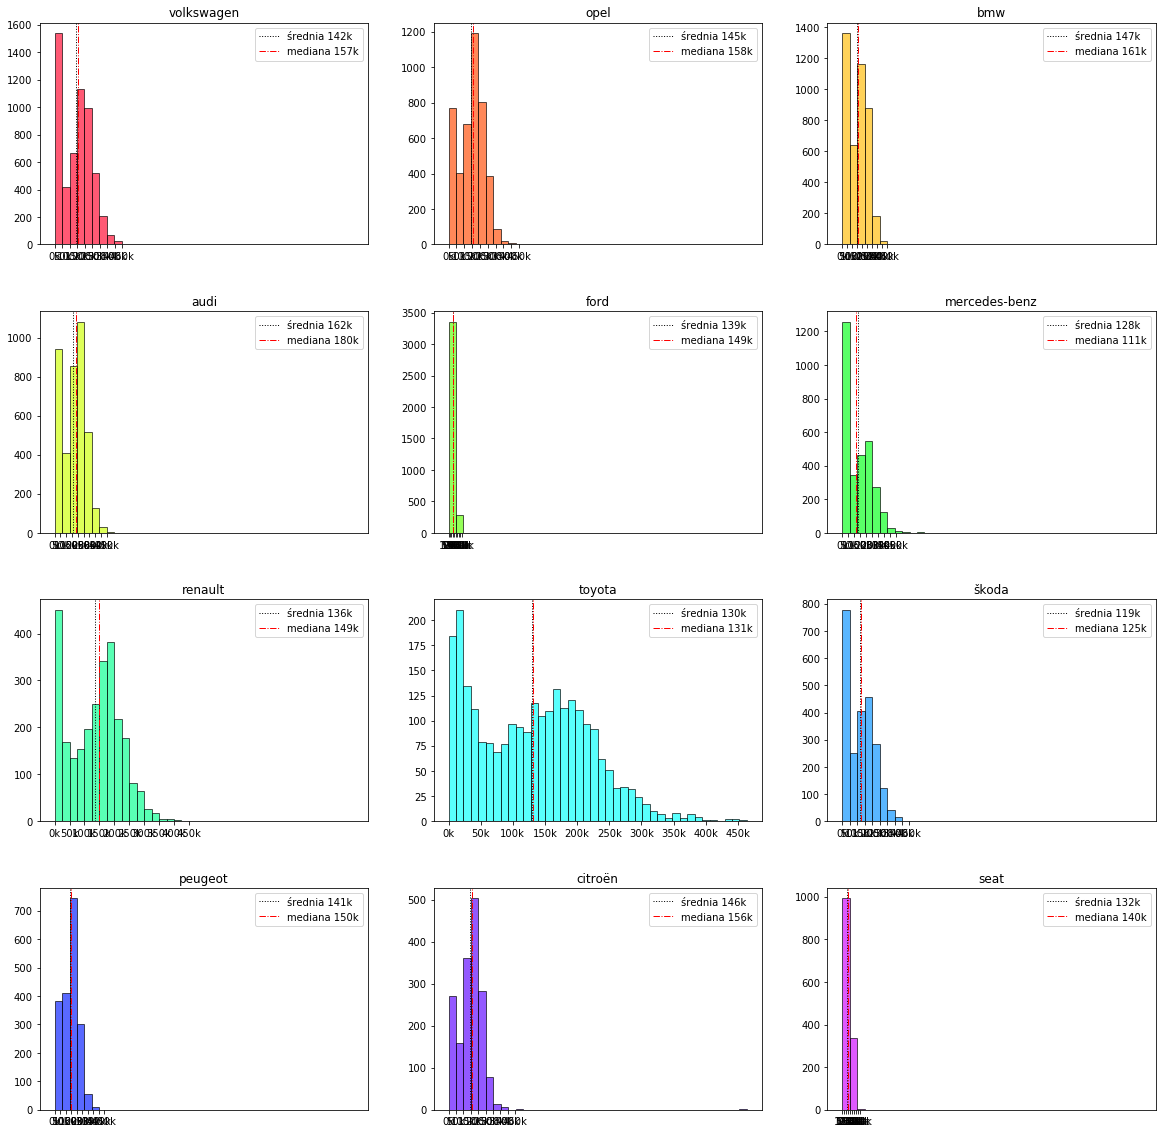

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 57968)
Traceback (most recent call last):
  File "/usr/lib/python3.7/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.7/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.7/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.7/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/python3.7/site-packages/pyspark/accumulators.py", line 269, in handle
    poll(accum_updates)
  File "/usr/lib/python3.7/site-packages/pyspark/accumulators.py", line 241, in poll
    if func():
  File "/usr/lib/python3.7/site-packages/pyspark/accumulators.py", line 245, in accum_updates
    num_updates = read_int(self.rfile)
  File "/usr/lib/python3.7/site-p

In [216]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm

pylab.rcParams['figure.figsize'] = 30, 20 

import math
from itertools import chain

def get_df_for_brand(brand):
    return CARS.select('przebieg') \
        .filter(CARS['marka'] == brand)\
        .toPandas()['przebieg']

fig, axes = plt.subplots(math.ceil(len(top_marki) / 3), 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

draws = chain.from_iterable(axes)
datas = map(lambda marka: (marka, get_df_for_brand(marka)), top_marki)
NUM_COLORS = len(top_marki)
cm = pylab.get_cmap('gist_rainbow')
cgen = (cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS))

for marka, data_przebiegi in datas:
    try:
        ax = next(draws)

        ax.hist(data_przebiegi, bins=40, color=next(cgen), edgecolor='k', alpha=0.65)
        
        xes = np.arange(0, 500000, 50000)
        xlabels = list(map(lambda x: "{0:.0f}k".format(x/1000) , xes))
        ax.set_xticks(xes)
        ax.set_xticklabels(xlabels)

        av_line = ax.axvline(data_przebiegi.mean(), color='k', linestyle=':', linewidth=1)
        med_line = ax.axvline(data_przebiegi.median(), color='red', linestyle='-.', linewidth=1)
        
        ax.legend([av_line, med_line], ["średnia {0:.0f}k".format(data_przebiegi.mean()/1000), "mediana {0:.0f}k".format(data_przebiegi.median()/1000)])
        ax.set_title(marka)
        
    except StopIteration as e:
        break

while True:
    try:
        ax = next(draws)
        ax.set_visible(False)
    except StopIteration as e:
        break

plt.show()